# MA124 Maths by Computer: Assignment 3 
## Part B: Geometric Brownian Motion

Student number: u2100098

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

We consider numerical simulations of the stochastic differential equation for Geometric Brownian Motion given by 

$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

We consider the following parameter values:

$$ t_f = 5 $$
$$ \mu = 0.05 $$
$$ \sigma = 0.25 $$
$$ S_0 = 100 $$

This corresponds to a 5 year period with an annual growth rate of 5%, volatility 0.25, and an inital stock price of 100.

$S(t)$ is taken to be positive and represents the value of a stock at time $t$. The deterministic ODE $\dot S(t) = \mu S(t)$, describes exponential growth in the value of a stock. We consider $\mu > 0$ and refer to $\mu$ as the growth rate. The term $\sigma S(t) \xi(t)$ describes fluctuations in the value of a stock. $\xi(t)$ is a Gaussian random variable. The parameter $\sigma > 0$ is known as the volatility. Notice that the fluctuating term contains $S(t)$ itself. This models the fact that fluctuations in a stock price are proportional to the price.

We solve the SDE by Euler's method using the chosen parameter values.

In [2]:
def SDE_GBM(S0, tf, mu, sigma, Npaths): 
    # Generate the time grid and solution array
    t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
    S = np.zeros((Nsteps+1,Npaths))
    root_dt = np.sqrt(dt)
    
    # Time step starting from initial condition
    S[0,:] = S0;
    for n in range(Nsteps):
        F_of_S = mu*S[n,:]
        S[n+1,:] =  S[n,:] + dt * F_of_S + sigma * S[n,:] * root_dt * np.random.randn(Npaths)
        
    return t,S

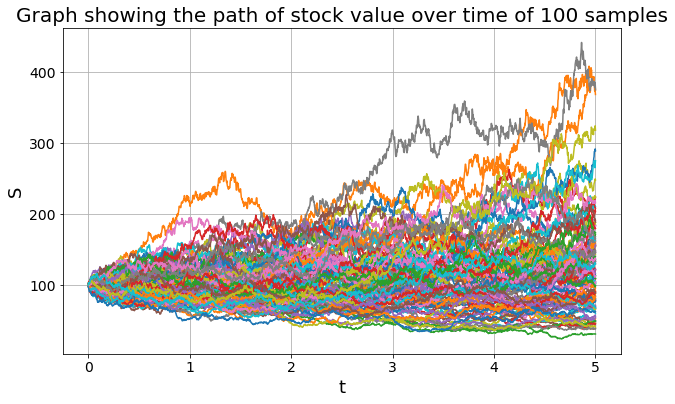

In [3]:
tf = 5
Nsteps = 365*tf

t,S=(SDE_GBM(100, 5, 0.05, 0.25, 100))

# Plot the 100 paths
plt.figure(figsize=(10,6))
plt.plot(t,S)
plt.xlabel("t", fontsize=18)
plt.ylabel("S", fontsize=18)
plt.title("Graph showing the path of stock value over time of 100 samples", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

The graph above shows the 100 sample paths, representing the value of the stock S over time t for 5 years. Initally, the value of the stock is 100, and varies according to the stochastic differential equation. I have solved the SDE using Euler's method, using a timestep of 1 day. Note that the graph is not smooth; there are random fluctuations caused by the Gaussian random variable $\xi(t)$.

The majority of the paths remain close to a stock value of 100 after 5 years, but there are a few slighly lower than 100 and a few significantly higher that 100 (exact values are not stated since the graph changes every time the code is run; $\xi(t)$ is a random variable).

Since the fluctuation of the stock value $\dot S(t)$ is proportional to the stock value $S(t)$,  the paths that rise above 100 start to have more drastic fluctuations (i.e. the change in stock value is greater per day), and the paths that fall below 100 remain nearly constant. This explains why after 5 years most of the paths are below a value of 300; those that rise in value can quickly fall in value.

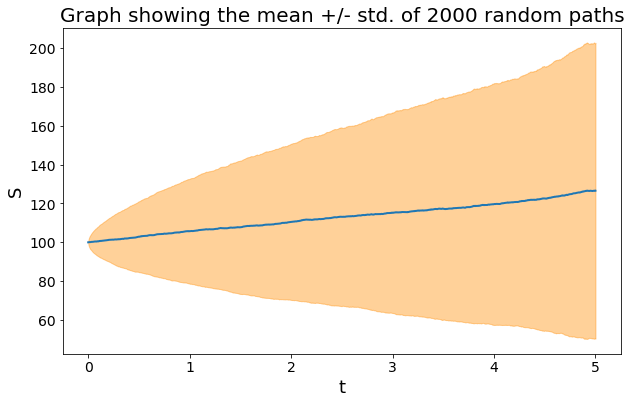

In [4]:
t,S=(SDE_GBM(100, 5, 0.05, 0.25, 2000))

# Plot the mean +/- standard deviation of 2000 paths as a function of time
# Compute the mean and standard deviation as function of time
S_mean = np.mean(S,1)
S_std = np.std(S,1)

# Plot shaded region between S_mean - S_std and S_mean + S_std 
plt.figure(figsize=(10,6))
plt.fill_between(t, 
                 S_mean - S_std, 
                 S_mean + S_std, 
                 alpha=0.4, color="darkorange")

# Plot the mean itself
plt.plot(t,S_mean, linewidth=2)

# Labels
plt.xlabel("t", fontsize=18)
plt.ylabel("S", fontsize=18)
plt.title("Graph showing the mean +/- std. of 2000 random paths", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The graph above shows the mean value (blue line) and 1 standard deviation from the mean (orange region) of 2000 stocks after each day for 5 years. The mean value of the stocks rises consistently over the 5 years, to an approximate value of 120 at the end. The previous graph showed that most stocks remained at a value of 100, but those that exceeded 100 made a much greater increase than the decrease in value by the stocks that fell below 100; this explains why the mean shown in this graph increases consistently. This shows that this level of growth rate and volatility results in a profit if you invest in enough stocks.

The standard deviation of the 2000 stocks also increases consistently over time; the Gaussian random variable $\xi(t)$ causes each of the paths to be different, leading to a greater spread of stock values. This reflects that over time, the range of different possible stock values increases.

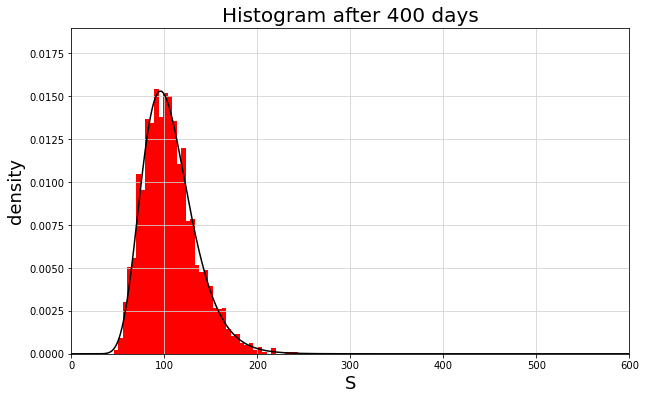

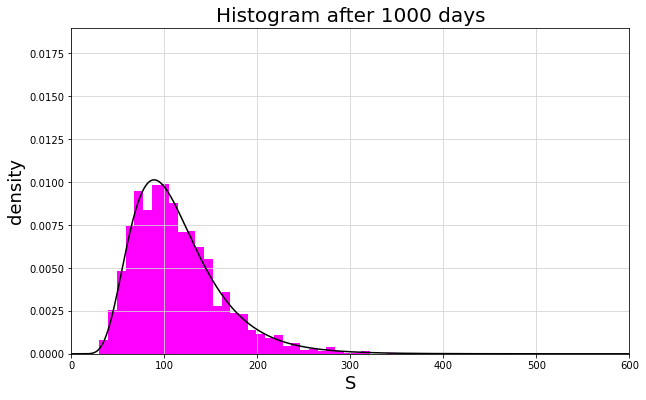

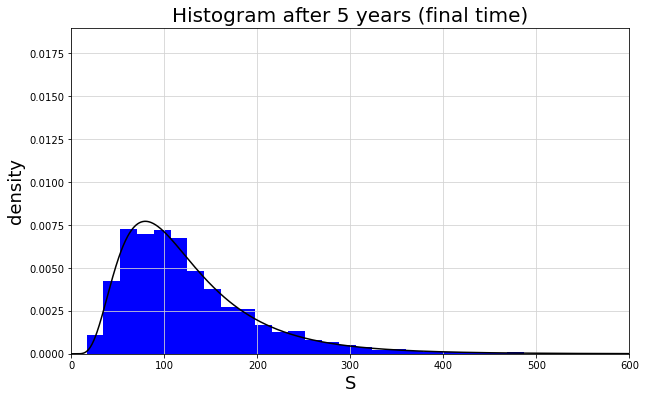

The means and the standard deviations for the histograms are as follows:
After 400 days:   106.32563672699136  and  28.540294636323154
After 1000 days:  114.0967952318752  and  48.19946401418232
After 5 years:    126.57558773900175  and  76.15985784275912


In [5]:
# Plotting the histograms and distributions after 400 days, 1000 days, and 5 years
# Define the array x for the x values of the lognormal distributions for the 3 histograms
x = np.linspace(0,600,1001)

# Format the first graph
plt.figure(figsize=(10,6))
# Limit the axes to the same scaling to allow for comparison
axes = plt.axes()
axes.set_ylim([0, 0.019])
axes.set_xlim([0, 600])

# Plot the histogram after 400 days
plt.hist(S[400,:], bins=41, density=True,color='red')
# Plot the corresponding lognormal distribution
s,loc,scale = lognorm.fit(S[400,:],floc=0)
pdf = lognorm.pdf(x,s,scale=scale)
plt.plot(x,pdf,color='k')
# Labels
plt.xlabel("S", fontsize=18)
plt.ylabel("density", fontsize=18)
plt.title("Histogram after 400 days", fontsize=20)
plt.grid(color='lightgrey')
plt.show()

# Format the second graph
plt.figure(figsize=(10,6))
# Limit the axes to the same scaling to allow for comparison
axes = plt.axes()
axes.set_ylim([0, 0.019])
axes.set_xlim([0, 600])

# Plot the histogram after 1000 days
plt.hist(S[1000,:], bins=41, density=True,color='magenta')
# Plot the corresponding lognormal distribution
s,loc,scale = lognorm.fit(S[1000,:],floc=0)
pdf = lognorm.pdf(x,s,scale=scale)
plt.plot(x,pdf,color='k')
# Labels
plt.xlabel("S", fontsize=18)
plt.ylabel("density", fontsize=18)
plt.title("Histogram after 1000 days", fontsize=20)
plt.grid(color='lightgrey')
plt.show()

# Format the third graph
plt.figure(figsize=(10,6))
# Limit the axes to the same scaling to allow for comparison
axes = plt.axes()
axes.set_ylim([0, 0.019])
axes.set_xlim([0, 600])

# Plot the histogram after 5 years
plt.hist(S[-1,:], bins=41, density=True,color='blue')
# Plot the corresponding lognormal distribution
s,loc,scale = lognorm.fit(S[-1,:],floc=0)
pdf = lognorm.pdf(x,s,scale=scale)
plt.plot(x,pdf,color='k')
# Labels
plt.xlabel("S", fontsize=18)
plt.ylabel("density", fontsize=18)
plt.title("Histogram after 5 years (final time)", fontsize=20)
plt.grid(color='lightgrey')
plt.show()

print('The means and the standard deviations for the histograms are as follows:')
print('After 400 days:  ',S_mean[400] ,' and ', S_std[400])
print('After 1000 days: ',S_mean[1000] ,' and ', S_std[1000])
print('After 5 years:   ',S_mean[-1] ,' and ', S_std[-1])

The 3 histograms above show the distribution of the value of 2000 stocks after 400 days, 1000 days, and 5 years with the given parameters. I used 41 bins in each histogram and plotted them on axes with the same scale.

In all 3 histograms the value $S = 100$ lies within the modal class (or one of the most common classes; the value of the stocks is random due to the variable $\xi(t)$). This is because most of the stocks remain valued at the initial value $ S_0 =100 $ as previously discussed.

As t increases, the frequency density at higher values of S begins to increase, causing the right tail of the distibution to grow. This is due to the volatility $\sigma$; because the fluctuations in the stock value are proportional to the stock value itself; any stocks that increase in value then begin to grow (or decrease in value) by a greater proportion, leading to larger spread of values, which in turn means there are more stocks worth a much greater amount. (This is reflected in the mean +/- standard deviation graph.) Hence as time increases, the value of the most valuable stocks will increase as well (given a large enough number of stocks).

The distribution of the histograms is plotted in a black line. Note that this is a lognormal distribution.

The growth of the right tail as explained above causes the graph to become increasingly negatively skewed, which causes the mean of the distribution to be greater than the median. This means that on average, investing enough stocks leads to a profit.